### **Let us import necessary packages**

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns

In [76]:
df = pd.read_csv('data_set1.csv')

### **Importing and playing with the data**

In [77]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [79]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


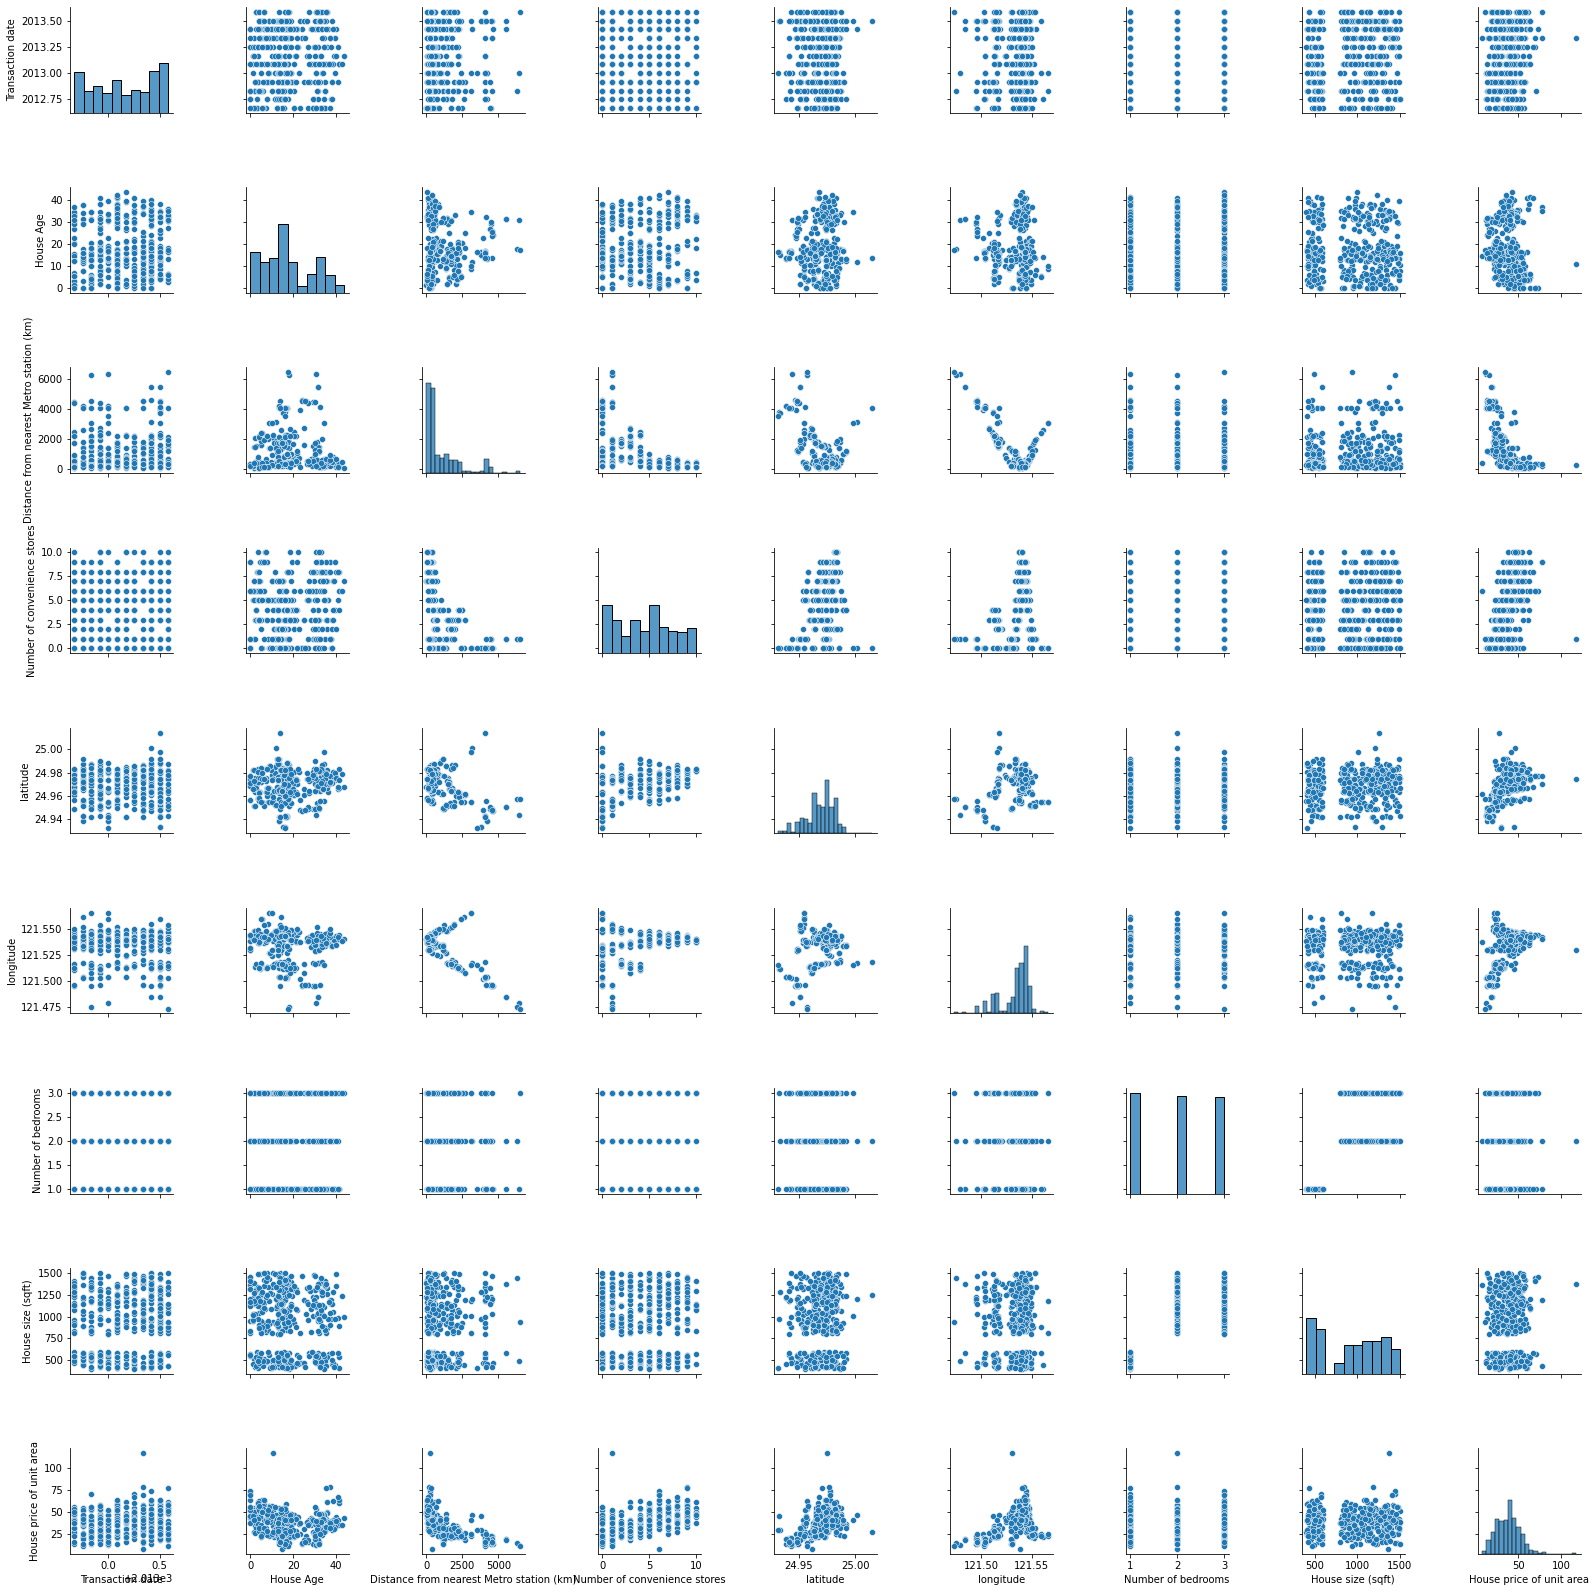

In [80]:
sns.pairplot(df)

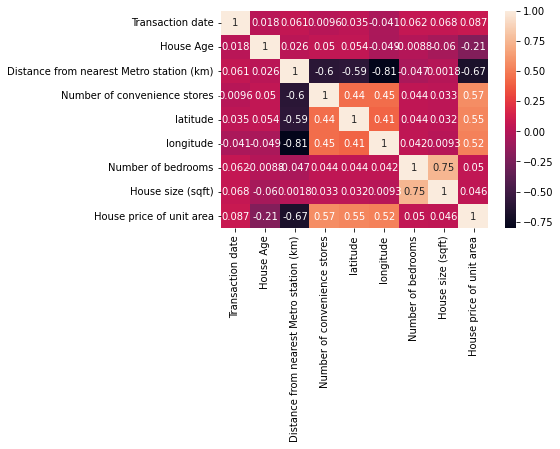

In [81]:
sns.heatmap(df.corr(), annot = True)

In [82]:
df_ = df[["latitude","longitude","Transaction date"]]

In [147]:
df_.isna().sum()

latitude            0
longitude           0
Transaction date    0
dtype: int64

## **Data Preprocessing**

### **Let us apply preprocssing techniques on all the features other than latitude, longitude and Transaction date**

In [83]:
df.drop("latitude", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)

In [84]:
df.drop("Transaction date", axis=1, inplace=True)

In [85]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


In [86]:
df.isna().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [87]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [88]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

## **Let us check for outliers in the data**

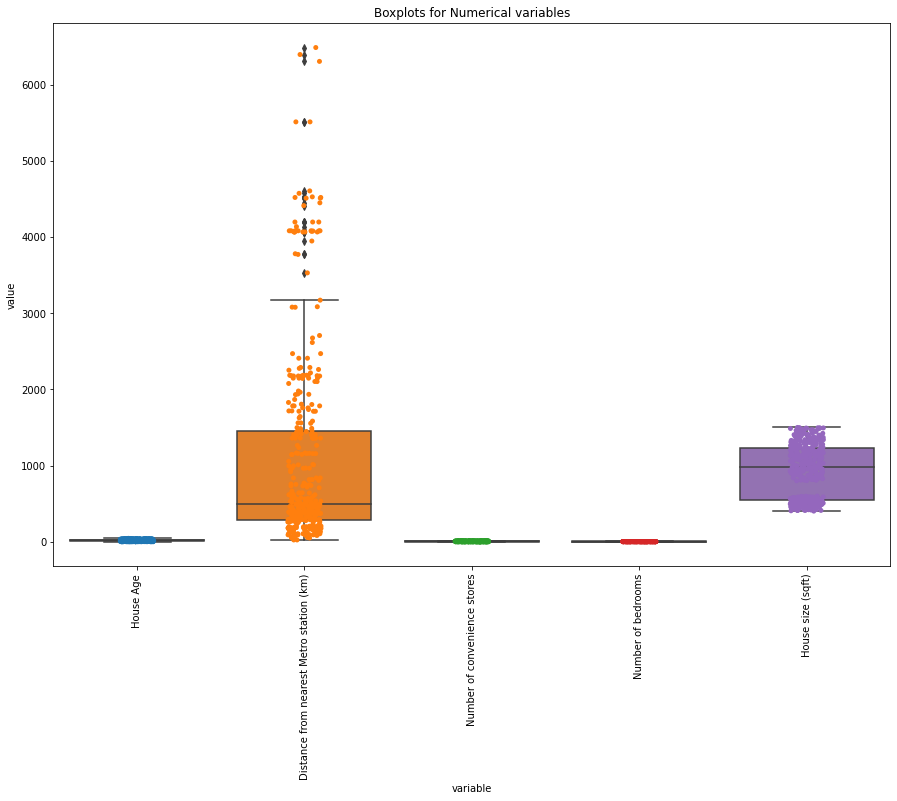

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns

NumericData = X[['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'Number of bedrooms', 'House size (sqft)']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

We see that 'Distance from nearest Metro station (km)' has a lot of outliers so we will deal with it

In [90]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'Number of bedrooms', 'House size (sqft)']:
    tempData = X.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'House Age': 0.0,
 'Distance from nearest Metro station (km)': 8.94,
 'Number of convenience stores': 0.0,
 'Number of bedrooms': 0.0,
 'House size (sqft)': 0.0}

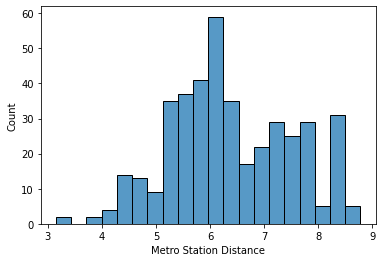

In [91]:
#Changing the "Distance from nearest Metro Station (km)" feature with log transform helps us to reduce the 
#outlier percentage 

X['Metro Station Distance'] = np.log(X['Distance from nearest Metro station (km)'])
sns.histplot(X['Metro Station Distance'], bins=20)

In [92]:
X.drop('Distance from nearest Metro station (km)', axis=1, inplace = True)

In [93]:
X

,House Age,Number of convenience stores,Number of bedrooms,House size (sqft),Metro Station Distance
0,32.0,10,1,575,4.441225
1,19.5,9,2,1240,5.725527
2,13.3,5,3,1060,6.331474
3,13.3,5,2,875,6.331474
4,5.0,5,1,491,5.967603
...,...,...,...,...,...
409,13.7,0,3,803,8.314346
410,5.6,9,2,1278,4.504864
411,18.8,7,1,503,5.968630
412,8.1,5,1,597,4.652150


## **Feature Scaling**

### **Since all the columns are numerical we will scale the values**

**Let us use Robust Scaler for this case, since the data still has a few outlier**

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = RobustScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

In [95]:
X_scaled

array([[ 0.83137255,  1.2       , -0.5       , -0.58245359, -1.08856688],
       [ 0.17777778,  1.        ,  0.        ,  0.3858755 , -0.29319252],
       [-0.14640523,  0.2       ,  0.5       ,  0.12377139,  0.0820737 ],
       ...,
       [ 0.14117647,  0.6       , -0.5       , -0.68729523, -0.1426376 ],
       [-0.41830065,  0.2       , -0.5       , -0.55041864, -0.95793969],
       [-0.50196078,  1.        ,  0.        ,  0.17764834, -1.04915457]])

In [96]:
X_scaled_ = pd.DataFrame(X_scaled, columns=X.columns)

In [97]:
X_scaled_

,House Age,Number of convenience stores,Number of bedrooms,House size (sqft),Metro Station Distance
0,0.831373,1.2,-0.5,-0.582454,-1.088567
1,0.177778,1.0,0.0,0.385876,-0.293193
2,-0.146405,0.2,0.5,0.123771,0.082074
3,-0.146405,0.2,0.0,-0.145613,0.082074
4,-0.580392,0.2,-0.5,-0.704769,-0.143273
...,...,...,...,...,...
409,-0.125490,-0.8,0.5,-0.250455,1.310076
410,-0.549020,1.0,0.0,0.441209,-1.049155
411,0.141176,0.6,-0.5,-0.687295,-0.142638
412,-0.418301,0.2,-0.5,-0.550419,-0.957940


In [98]:
df_

,latitude,longitude,Transaction date
0,24.98298,121.54024,2012.917
1,24.98034,121.53951,2012.917
2,24.98746,121.54391,2013.583
3,24.98746,121.54391,2013.500
4,24.97937,121.54245,2012.833
...,...,...,...
409,24.94155,121.50381,2013.000
410,24.97433,121.54310,2012.667
411,24.97923,121.53986,2013.250
412,24.96674,121.54067,2013.000


In [99]:
df_ = df_.reset_index(drop=True)
df_.head()

,latitude,longitude,Transaction date
0,24.98298,121.54024,2012.917
1,24.98034,121.53951,2012.917
2,24.98746,121.54391,2013.583
3,24.98746,121.54391,2013.500
4,24.97937,121.54245,2012.833


In [100]:
X_scaled_ = pd.concat([X_scaled_,df_],axis=1)

In [101]:
X_scaled_

,House Age,Number of convenience stores,Number of bedrooms,House size (sqft),Metro Station Distance,latitude,longitude,Transaction date
0,0.831373,1.2,-0.5,-0.582454,-1.088567,24.98298,121.54024,2012.917
1,0.177778,1.0,0.0,0.385876,-0.293193,24.98034,121.53951,2012.917
2,-0.146405,0.2,0.5,0.123771,0.082074,24.98746,121.54391,2013.583
3,-0.146405,0.2,0.0,-0.145613,0.082074,24.98746,121.54391,2013.500
4,-0.580392,0.2,-0.5,-0.704769,-0.143273,24.97937,121.54245,2012.833
...,...,...,...,...,...,...,...,...
409,-0.125490,-0.8,0.5,-0.250455,1.310076,24.94155,121.50381,2013.000
410,-0.549020,1.0,0.0,0.441209,-1.049155,24.97433,121.54310,2012.667
411,0.141176,0.6,-0.5,-0.687295,-0.142638,24.97923,121.53986,2013.250
412,-0.418301,0.2,-0.5,-0.550419,-0.957940,24.96674,121.54067,2013.000


In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_, y, test_size=0.15, random_state=42)

In [104]:
X_train

,House Age,Number of convenience stores,Number of bedrooms,House size (sqft),Metro Station Distance,latitude,longitude,Transaction date
180,0.564706,-0.8,0.0,0.518384,1.363428,24.94898,121.49621,2012.667
347,0.067974,-0.6,0.5,-0.061158,1.597041,24.95719,121.47353,2013.583
266,0.088889,-0.2,0.0,0.652348,0.797172,24.96731,121.51486,2013.250
22,-0.073203,-0.6,0.5,0.672734,0.629457,24.95204,121.54842,2012.917
46,0.292810,1.0,-0.5,-0.608664,-0.036629,24.97030,121.54458,2013.417
...,...,...,...,...,...,...,...,...
71,1.014379,-0.2,-0.5,-0.643611,0.163294,24.97563,121.53715,2013.083
106,0.057516,0.8,0.5,-0.151438,-0.591104,24.97707,121.54308,2013.083
270,-0.277124,-0.6,0.0,0.579541,-0.413208,24.97460,121.53046,2013.333
348,-0.601307,0.4,0.5,0.302876,-0.396091,24.97585,121.54516,2012.833


In [105]:
y_train

180     15.5
347     11.2
266     23.7
22      24.6
46      42.0
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: House price of unit area, Length: 351, dtype: float64

In [106]:
X_test

,House Age,Number of convenience stores,Number of bedrooms,House size (sqft),Metro Station Distance,latitude,longitude,Transaction date
358,-0.784314,0.4,0.0,0.066982,-0.577957,24.96571,121.54089,2013.167
350,-0.151634,0.2,0.0,0.248999,0.000000,24.96515,121.53737,2013.000
373,-0.841830,-0.6,0.0,0.286858,-0.362769,24.97480,121.53059,2013.083
399,-0.177778,-0.6,-0.5,-0.707681,-0.657945,24.97371,121.52984,2012.917
369,0.214379,-0.2,0.5,0.546050,0.923062,24.96322,121.51237,2012.667
...,...,...,...,...,...,...,...,...
77,0.230065,-0.2,0.0,0.484893,0.923062,24.96322,121.51237,2012.833
39,0.005229,0.2,0.5,0.380051,-0.329098,24.98203,121.54348,2013.167
401,-0.444444,-0.2,0.0,0.396068,0.920193,24.96305,121.51254,2013.083
25,0.690196,-0.4,0.5,0.052421,0.685044,24.97542,121.51726,2013.083


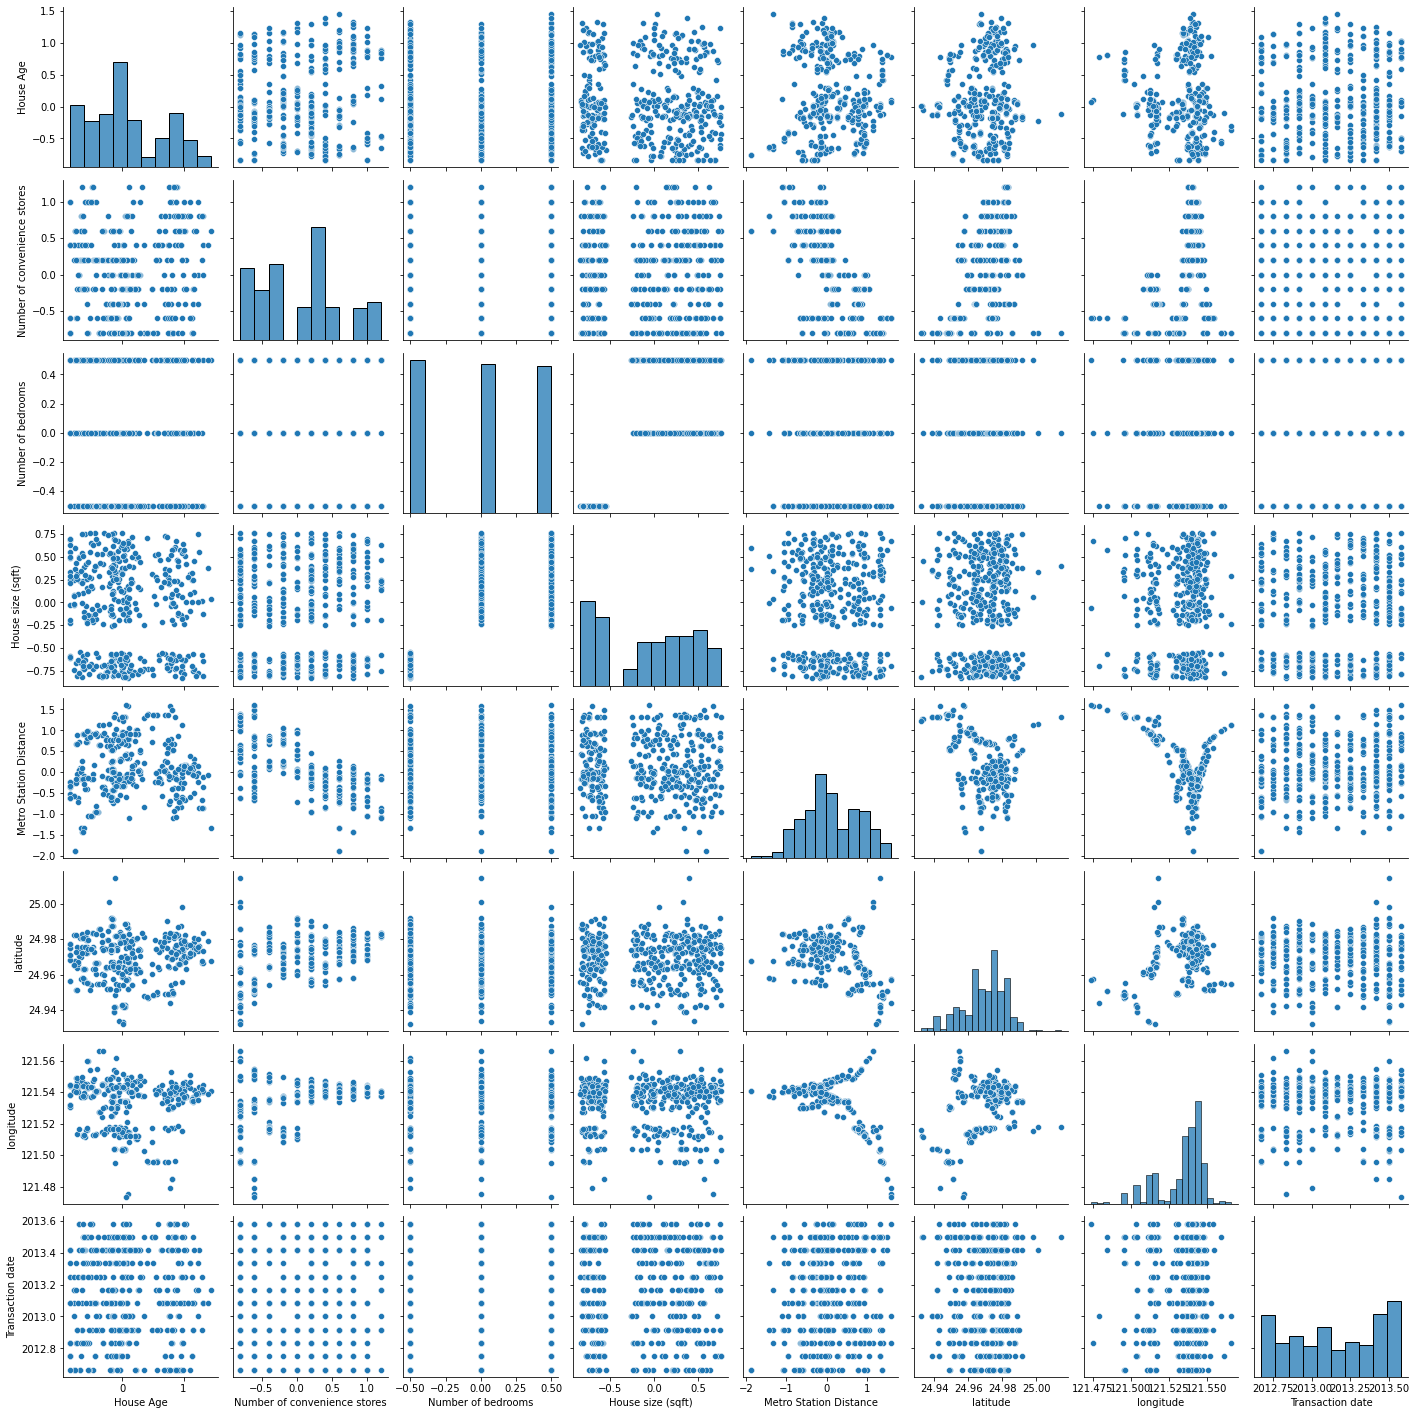

In [107]:
sns.pairplot(X_scaled_)

# **Trying Out various Models before selecting the best Model**

## **Linear Regression** 

In [110]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
print("model score: %.3f" %lin_reg.score(X_train, y_train))

model score: 0.644


In [111]:
y_pred_lin_reg = lin_reg.predict(X_test)

In [112]:
y_pred_lin_reg

array([49.82297287, 38.74404621, 48.06720085, 46.73692052, 23.23580579,
       42.65836437, 45.79523594, 47.77310192, 21.43289437, 59.8276405 ,
       29.93995212, 32.1197886 , 34.41037293, 21.27521482, 32.61815569,
       30.93424318, 41.31989074, 54.04911199, 24.83073289, 41.82850217,
        8.5616391 , 30.92189326, 47.84993116, 44.85550009, 12.97679989,
       45.58270366, 13.9986983 , 46.44515731, 39.36477429, 38.52680685,
       16.60188309, 35.84214695, 33.24065462, 25.1609868 , 46.23201638,
       33.74908478, 55.56485418, 15.38509932, 45.10284345, 39.30982232,
       39.63381457, 39.3030205 , 52.33495203, 35.93841864, 37.22963484,
       46.25558022, 39.89723416, 20.59313154, 62.6393651 , 50.63347921,
       50.11771188, 48.48560682, 38.95713157, 40.42989532, 35.87821868,
       16.50700723, 34.79351086, 33.8212892 , 24.11849968, 47.60030021,
       28.81405873, 29.31562512, 16.47000992])

## **Model Evaluation**

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
print('r2 score : ', r2_score(y_test, y_pred_lin_reg))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_lin_reg))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_lin_reg))

r2 score :  0.6905291733458708
mean_squared_error :  55.04265588596009
mean_absolute_error :  4.784679540035445


## **XG Boost**

In [117]:
import xgboost

xgb_reg = xgboost.XGBRegressor(base_score=0.75, learning_rate=0.2, max_depth=10,
             n_estimators=1500)

# XGBRegressor(base_score=0.25, n_estimators=500)

xgb_reg.fit(X_train, y_train)
print("model score: %.3f" %xgb_reg.score(X_train, y_train))

[13:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model score: 1.000


In [118]:
y_pred_xgb = xgb_reg.predict(X_test)

In [119]:
print('r2 score : ', r2_score(y_test, y_pred_xgb))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_xgb))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_xgb))

r2 score :  0.7983425720408527
mean_squared_error :  35.86690394700256
mean_absolute_error :  4.057527651105609


### **Hyper Parameter Tuning**

In [120]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree', 'gblinear']
base_score = [0.25,0.5,0.75,1]
learning_rate = [0.02, 0.05, 0.15, 0.1, 0.2]
min_child_weight = [1,2,3,4]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=xgb_reg,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50,
                               scoring='neg_mean_absolute_error', n_jobs=4,
                               verbose=5,
                               return_train_score = True,
                               random_state=42)

In [122]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.75, learning_rate=0.2,
                                          max_depth=10, n_estimators=1500),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.02, 0.05, 0.15, 0.1,
                                                          0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [123]:
random_cv.best_estimator_

XGBRegressor(learning_rate=0.02, max_depth=2, min_child_weight=2,
             n_estimators=500)

## **Decision Tree Regressor**

In [127]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()

dec_tree.fit(X_train, y_train)
print("model score: %.3f" %dec_tree.score(X_train, y_train))

model score: 1.000


In [128]:
y_pred_tree = dec_tree.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_tree))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_tree))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_tree))

r2 score :  0.676514924498453
mean_squared_error :  57.53523809523809
mean_absolute_error :  5.542857142857144


## **Ensemble Methods**

**Bagging**

In [129]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()

bagging.fit(X_train, y_train)
print("model score: %.3f" %bagging.score(X_train, y_train))


model score: 0.920


In [130]:
y_pred_bagging = bagging.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_bagging))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_bagging))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_bagging))

r2 score :  0.8021639218800293
mean_squared_error :  35.18723650793652
mean_absolute_error :  3.8306349206349197


## **Random Forest Regressor**

In [131]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
print("model score: %.3f" %rfr.score(X_train, y_train))

model score: 0.951


In [132]:
y_pred_rfr = rfr.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_rfr))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_rfr))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_rfr))

r2 score :  0.8070567826847301
mean_squared_error :  34.316989523809504
mean_absolute_error :  3.8275238095238096


### **Hyperparameter tuning**

In [133]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [134]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [135]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400)

In [136]:
rfr_hyp = RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=10, n_estimators=1000)

rfr_hyp.fit(X_train, y_train)
print("model score: %.3f" %rfr_hyp.score(X_train, y_train))

model score: 0.934


In [137]:
y_pred_rfr_hyp = rfr_hyp.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_rfr_hyp))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_rfr_hyp))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_rfr_hyp))

r2 score :  0.8367436091369619
mean_squared_error :  29.0368738165456
mean_absolute_error :  3.558346579743002


## **Gradient Boost Regressor**

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.15, max_depth=5, min_samples_split=10,
                          n_estimators=900, n_iter_no_change=10,
                          random_state=101, subsample=1)

gbr.fit(X_train, y_train)
print("model score: %.3f" %gbr.score(X_train, y_train))

model score: 0.969


In [139]:
y_pred_gbr = gbr.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_gbr))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_gbr))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_gbr))

r2 score :  0.8006121056810475
mean_squared_error :  35.463243412891984
mean_absolute_error :  4.021743033753431


In [140]:
loss = ['squared_error']
learning_rate = [0.02, 0.05, 0.15, 0.1, 0.2]
subsample = [0.5, 1]
n_estimators = [100, 500, 900, 1100, 1500]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,5]
max_depth = [2,3,5,10,15]
random_state = [42,101]
max_features = [1,2,3]
validation_fraction = [0.1, 0.2]
n_iter_no_change = [10,20]

hyperparameter_grid = {
    'loss' : loss,
    'subsample' : subsample,
    'n_estimators' : n_estimators,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_depth' : max_depth,
    'random_state' : random_state,
    'learning_rate' : learning_rate,
    'validation_fraction' : validation_fraction,
    'n_iter_no_change' : n_iter_no_change
}

In [141]:
random_cv = RandomizedSearchCV(estimator=gbr,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50,
                               scoring='neg_mean_absolute_error', n_jobs=4,
                               verbose=5,
                               return_train_score = True,
                               random_state=42)

In [142]:
gbr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [143]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.15,
                                                       max_depth=5,
                                                       min_samples_split=10,
                                                       n_estimators=900,
                                                       n_iter_no_change=10,
                                                       random_state=101,
                                                       subsample=1),
                   n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.02, 0.05, 0.15, 0.1,
                                                          0.2],
                                        'loss': ['squared_error'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 1

In [144]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.02, max_depth=10, min_samples_leaf=2,
                          n_estimators=900, n_iter_no_change=10,
                          random_state=42, subsample=0.5,
                          validation_fraction=0.2)

In [145]:
gbr_hyp = GradientBoostingRegressor(learning_rate=0.02, max_depth=10, min_samples_leaf=2,
                          n_estimators=900, n_iter_no_change=10,
                          random_state=42, subsample=0.5,
                          validation_fraction=0.2)

gbr_hyp.fit(X_train, y_train)
print("model score: %.3f" %gbr_hyp.score(X_train, y_train))

model score: 0.829


In [146]:
y_pred_gbr_hyp = gbr_hyp.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred_gbr_hyp))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_gbr_hyp))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_gbr_hyp))

r2 score :  0.8012642541476438
mean_squared_error :  35.34725191856757
mean_absolute_error :  4.294195495299535


## **So the best model selected after experimentation was *Random Forest Regressor*** 